# Sprint 12. Tasca 01. Pipelines, GridSearch, Text mining
## By José Manuel Castaño

## - Exercici 1

Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
realstate = pd.read_csv('realtor-data.csv', engine='python')

In [3]:
realstate

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
301854,for_sale,469000.0,3.0,1.0,0.15,"4 Colonial Ct, Portland, ME, 04102",4 Colonial Ct,Portland,Maine,4102.0,1450.0,2016-01-29
301855,for_sale,450000.0,4.0,2.0,0.33,"26 Decary Rd, Biddeford, ME, 04005",26 Decary Rd,Biddeford,Maine,4005.0,1680.0,2016-11-08
301856,for_sale,479900.0,2.0,1.0,0.11,"41 Rest View Ln, Wells, ME, 04090",41 Rest View Ln,Wells,Maine,4090.0,936.0,2020-12-02
301857,for_sale,849900.0,4.0,3.0,0.26,"26 Coolidge Ave, South Portland, ME, 04106",26 Coolidge Ave,South Portland,Maine,4106.0,2019.0,2019-09-16


## Descripción del DataSet
El dataset contiene más 301k registros y 12 columnas de ventas de casas en USA. Contiene la siguiente información:

- status:      Si la casa está disponible para vender o preparada para construirse
- price:       Precio (es la variable target)
- bed:         Número de habitacions
- bath:        Número de baños
- acre_lot:    Superficie de la parcela
- full_address:Dirección completa de la casa
- street:      Calle de la casa
- city:        Ciudad
- state:       Estado
- zip_code:    Código postal
- house_size:  Tamaño de la casa
- sold_date:   Fecha de la anterior venta

## Objetivo:
Predecir el precio de venta de una casa en función de sus características y ubicación

Analizamos si existen registros duplicados

In [4]:
realstate[realstate.duplicated()]

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
135,for_sale,105000.0,3.0,2.0,0.08,"DD18 Calle 28, Ponce, PR, 00728",DD18 Calle 28,Ponce,Puerto Rico,728.0,1500.0,NaN
139,for_sale,300000.0,5.0,3.0,7.46,"Pr 120 Bo Maravilla Sur K M # 335, Las Marias,...",Pr 120 Bo Maravilla Sur K M # 335,Las Marias,Puerto Rico,670.0,5403.0,NaN
140,for_sale,155000.0,3.0,2.0,0.10,"Pr, Lares, PR, 00669",Pr,Lares,Puerto Rico,669.0,4161.0,NaN
148,for_sale,122500.0,3.0,2.0,0.05,"16 Muoz Rivera St, Yauco, PR, 00698",16 Muoz Rivera St,Yauco,Puerto Rico,698.0,1118.0,NaN
149,for_sale,575000.0,3.0,2.0,3.88,"5.8 Carr 435 Km # 58, San Sebastian, PR, 00685",5.8 Carr 435 Km # 58,San Sebastian,Puerto Rico,685.0,4000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
301854,for_sale,469000.0,3.0,1.0,0.15,"4 Colonial Ct, Portland, ME, 04102",4 Colonial Ct,Portland,Maine,4102.0,1450.0,2016-01-29
301855,for_sale,450000.0,4.0,2.0,0.33,"26 Decary Rd, Biddeford, ME, 04005",26 Decary Rd,Biddeford,Maine,4005.0,1680.0,2016-11-08
301856,for_sale,479900.0,2.0,1.0,0.11,"41 Rest View Ln, Wells, ME, 04090",41 Rest View Ln,Wells,Maine,4090.0,936.0,2020-12-02
301857,for_sale,849900.0,4.0,3.0,0.26,"26 Coolidge Ave, South Portland, ME, 04106",26 Coolidge Ave,South Portland,Maine,4106.0,2019.0,2019-09-16


Observamos que existen 273,826 duplicados!!!. Eliminamos los duplicados

In [5]:
realstate.drop_duplicates(inplace=True)

Eliminamos los campos **full_adress, street, city y state** porque trabajaremos únicamente con **zip_code** como variable de ubicación.     
Eliminamos el campo **sold_date** porque no parece relevante para predecir el target la fecha de la anterior venta de la casa

In [6]:
realstate.drop(['full_address', 'street', 'city', 'state', 'sold_date'], axis=1, inplace=True)

Analizamos los valores nulos

In [7]:
realstate.isnull().sum()

status           0
price            0
bed           6298
bath          6218
acre_lot      4646
zip_code        28
house_size    6137
dtype: int64

Observamos que tenemos Nan en los campos **bed, bath, acre_lot, zip_code y house_size**, variables que son determinantes en el precio de una casa. Y obviamente no nos los podemos inventar o sustituir por otros valores como media, mediana, etc. Por ello, eliminamos los registros que contengan NaN en dichos campos

In [8]:
realstate.dropna(subset=['bed', 'bath','acre_lot', 'zip_code', 'house_size', ], inplace=True)

In [9]:
realstate.isnull().sum()

status        0
price         0
bed           0
bath          0
acre_lot      0
zip_code      0
house_size    0
dtype: int64

In [10]:
realstate.shape

(16990, 7)

Ya tenemos el dataset limpio de valores nulos y no repetidos. Pasamos a tener **16,990 registros disponibles**

In [11]:
realstate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16990 entries, 0 to 300424
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   status      16990 non-null  object 
 1   price       16990 non-null  float64
 2   bed         16990 non-null  float64
 3   bath        16990 non-null  float64
 4   acre_lot    16990 non-null  float64
 5   zip_code    16990 non-null  float64
 6   house_size  16990 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.0+ MB


Vemos la distribución de los diferentes campos

In [12]:
realstate.describe()

,price,bed,bath,acre_lot,zip_code,house_size
count,1.699000e+04,16990.000000,16990.000000,16990.000000,16990.000000,1.699000e+04
mean,7.933793e+05,3.813067,2.701942,12.759334,3419.439847,2.466503e+03
std,1.447964e+06,2.255037,2.311906,794.565089,2461.944619,1.126389e+04
min,9.000000e+03,1.000000,1.000000,0.000000,601.000000,1.700000e+02
25%,2.899000e+05,3.000000,2.000000,0.160000,1960.000000,1.332000e+03
50%,4.499000e+05,3.000000,2.000000,0.350000,2859.000000,1.920000e+03
75%,7.500000e+05,4.000000,3.000000,1.010000,4103.000000,2.850750e+03
max,6.000000e+07,99.000000,198.000000,100000.000000,95000.000000,1.450112e+06


Observamos que todas las variables tienen outliers muy alejados. Vemos en el extremo que hay casas de 60M de dolares, de 99 habitaciones, 198 baños...

Convertimos la varizable **zip_code** en entero

In [13]:
realstate.zip_code=realstate.zip_code.astype(int)

Vemos gráficamente la distribución de las variables numéricas

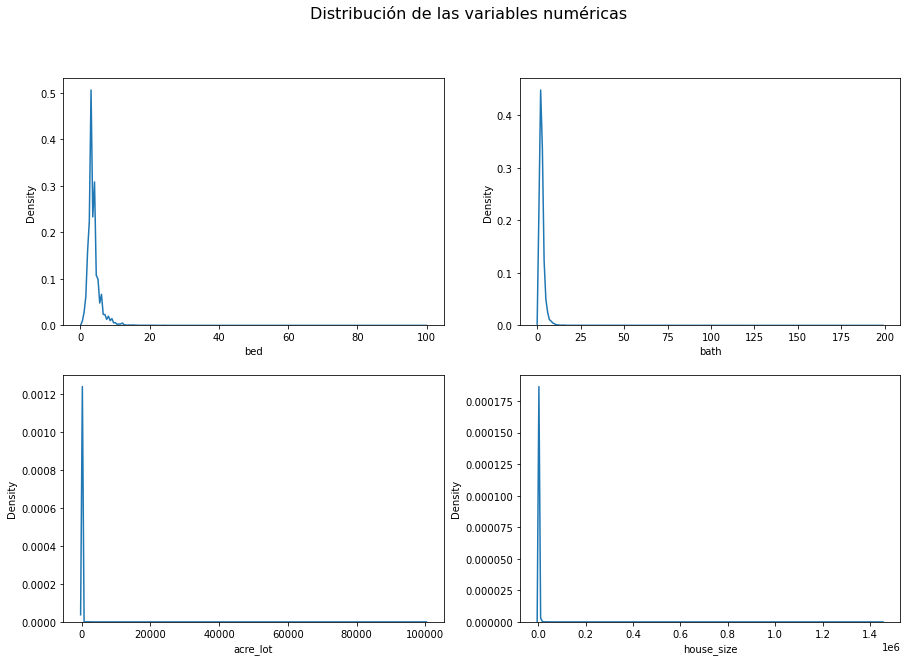

In [14]:
var_num= ['bed', 'bath', 'acre_lot', 'house_size']
f, axes = plt.subplots(2,2, figsize = (15, 10))
f.suptitle('Distribución de las variables numéricas', fontsize = 16 )

for i, ax in enumerate(axes.flatten()): 
    sns.kdeplot(realstate[var_num].iloc[: , i], ax = ax); 

Observamos la presencia de outliers muy alejados. Realizamos un boxplot para verlo com más detalle

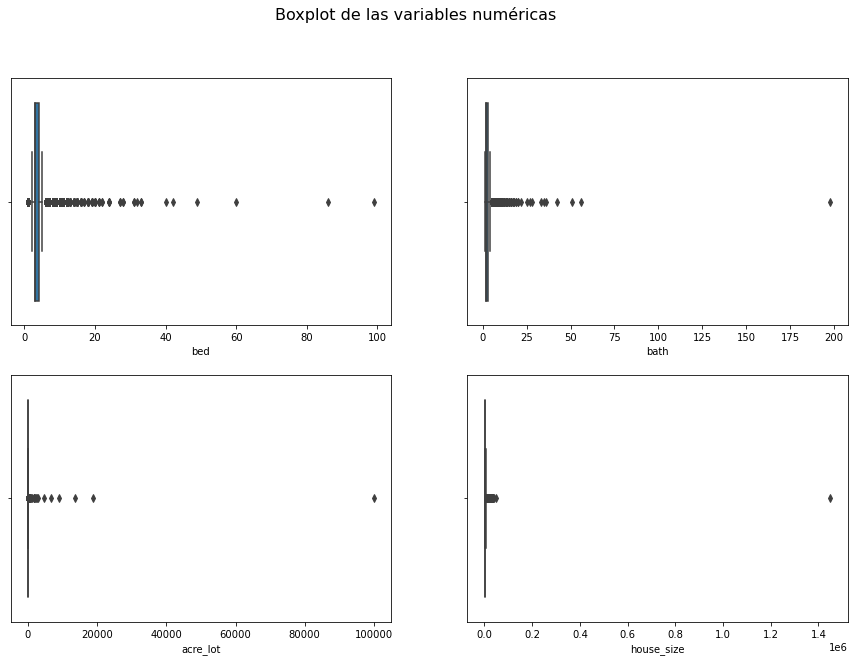

In [15]:
f, axes = plt.subplots(2,2, figsize = (15, 10))
f.suptitle('Boxplot de las variables numéricas', fontsize = 16 )

for i, ax in enumerate(axes.flatten()): 
    sns.boxplot(x=realstate[var_num].iloc[: , i], ax = ax); 

Debido a los outliers tan alejados, tendremos que realizar algún escalado posterior que minimice su efecto en el modelo. Pero aún y así, creemos conveniente eliminar algún otulier que está muy fuera de rango y que podría distorsionar el modelo.

Vemos la distribución del target (price)

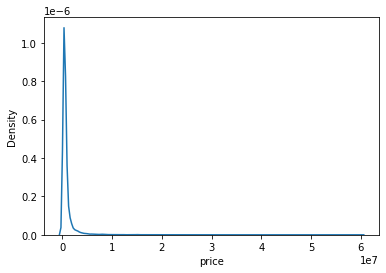

In [16]:
sns.kdeplot(realstate.price);

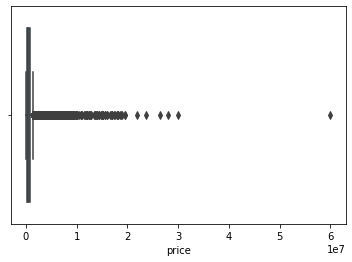

In [17]:
sns.boxplot(x=realstate.price);

### Eliminación de outliers
Analizamos los outliers susceptibles de ser eliminados por su lejanía y singularidad

In [18]:
#Precio de 60,000,000
realstate[realstate.price>50000000]

,status,price,bed,bath,acre_lot,zip_code,house_size
40599,for_sale,60000000.0,9.0,10.0,400.0,6281,18777.0


In [19]:
#acre_lot de 100,000
realstate[realstate.acre_lot>80000]

,status,price,bed,bath,acre_lot,zip_code,house_size
18822,for_sale,585000.0,4.0,4.0,100000.0,926,3300.0


In [20]:
#bath de 198 y 99 habitaciones
realstate[realstate.bath>100]

,status,price,bed,bath,acre_lot,zip_code,house_size
121247,for_sale,5300000.0,99.0,198.0,0.29,2152,14462.0


In [21]:
#house_size >1,000,000
realstate[realstate.house_size>1000000]

,status,price,bed,bath,acre_lot,zip_code,house_size
10328,for_sale,8250000.0,5.0,6.0,33.29,775,1450112.0


Creemos conveniente eliminar estos 4 ouliers porque o se trata de errores o bien se trata de casas muy singulares y muy fuera de rango. Por tanto quedarían fuera del modelo las casas que:
- Price >50,000,000
- Acre_lot >80,000
- bath >100
- house_size >1,000,000

In [22]:
#Eliminamos outliers
realstate.drop(realstate[realstate.price>50000000].index, inplace=True)
realstate.drop(realstate[realstate.acre_lot>80000].index, inplace=True)
realstate.drop(realstate[realstate.bath>100].index, inplace=True)
realstate.drop(realstate[realstate.house_size>1000000].index, inplace=True)

Para las variables categóricas vemos su distribución de frecuencias

In [23]:
realstate.status.value_counts(ascending=False)

for_sale    16986
Name: status, dtype: int64

In [24]:
realstate.zip_code.value_counts(ascending=False)

1201    126
6790    114
2895    113
2649    103
2864    100
       ... 
5846      1
6390      1
3771      1
2875      1
796       1
Name: zip_code, Length: 1314, dtype: int64

La variable **zip_code** tiene 1314 valores distintos. La dummificaremos  
La variable **status** sólo tiene un valor, **for_sale**, así que la eliminamos

In [25]:
realstate.drop(['status'], axis=1, inplace=True)

### Pipeline
En el pipeline únicamente aplicaremos **RobustScaler** para las variables numéricas ya que presentan bastantes outliers.
Pero no podemos aplicar OneHotEncoder en el pipeline para la variable categórica **zip_code** debido a que existen algunos zip_code con muy pocos registros y cuando entrenásemos el pipeline con X_train (que tiene un 70% de los datos), podríamos encontrarnos que no tuviera algunos de los códigos, con lo que no se dummificarían. Posteriormente al aplicar el X_test nos daría error porque no reconocería dichos campos.   
Por tanto, previamente a separar en Train/Test, dummificaremnos zip_code

In [26]:
realstate= pd.get_dummies(realstate, columns=['zip_code'])

In [27]:
realstate

,price,bed,bath,acre_lot,house_size,zip_code_601,zip_code_602,zip_code_603,zip_code_605,zip_code_606,zip_code_610,zip_code_612,zip_code_613,zip_code_617,zip_code_622,zip_code_623,zip_code_624,zip_code_627,zip_code_637,zip_code_638,zip_code_639,zip_code_641,zip_code_646,zip_code_650,zip_code_653,zip_code_656,zip_code_659,zip_code_660,zip_code_662,zip_code_664,zip_code_667,zip_code_669,zip_code_670,zip_code_674,zip_code_676,zip_code_677,zip_code_678,zip_code_680,zip_code_682,zip_code_683,zip_code_685,zip_code_687,zip_code_688,zip_code_692,zip_code_693,zip_code_694,zip_code_698,zip_code_703,zip_code_705,zip_code_707,...,zip_code_12060,zip_code_12061,zip_code_12062,zip_code_12063,zip_code_12075,zip_code_12082,zip_code_12089,zip_code_12090,zip_code_12094,zip_code_12106,zip_code_12123,zip_code_12125,zip_code_12130,zip_code_12132,zip_code_12136,zip_code_12138,zip_code_12140,zip_code_12153,zip_code_12165,zip_code_12168,zip_code_12169,zip_code_12180,zip_code_12184,zip_code_12196,zip_code_12405,zip_code_12501,zip_code_12502,zip_code_12503,zip_code_12513,zip_code_12514,zip_code_12516,zip_code_12517,zip_code_12521,zip_code_12522,zip_code_12523,zip_code_12528,zip_code_12529,zip_code_12534,zip_code_12545,zip_code_12546,zip_code_12565,zip_code_12567,zip_code_12571,zip_code_12578,zip_code_12581,zip_code_12592,zip_code_12594,zip_code_12958,zip_code_82414,zip_code_95000
0,105000.0,3.0,2.0,0.12,920.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,80000.0,4.0,2.0,0.08,1527.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,67000.0,2.0,1.0,0.15,748.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,145000.0,4.0,2.0,0.10,1800.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,179000.0,4.0,3.0,0.46,2520.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300286,569900.0,3.0,3.0,0.67,1560.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
300292,1195000.0,3.0,2.0,0.46,2453.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
300420,429900.0,2.0,3.0,20.00,1495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
300421,637900.0,3.0,3.0,1.02,1624.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Train/Test
Separamos el target de las variables y realizamos el Train/Test (Test 30%)

In [28]:
y= realstate.price
x= realstate.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 0)

In [29]:
#Seleccionamos las variables numéricas
var_num=['bed', 'bath', 'acre_lot', 'house_size']

In [30]:
#Transformación de columnas
preprocesado= ColumnTransformer(remainder='passthrough',
                                transformers= [('num', RobustScaler(), var_num)])

In [31]:
#pipeline
rfr = RandomForestRegressor(random_state= 0)
pipeline = Pipeline(steps = [('preprocesado', preprocesado), 
                             ('modelo', rfr )])

In [32]:
#Entrenamos el modelo
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocesado',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  ['bed', 'bath', 'acre_lot',
                                                   'house_size'])])),
                ('modelo', RandomForestRegressor(random_state=0))])

In [33]:
#Evaluamos el modelo
R2_Train = r2_score(y_train, pipeline.predict(X_train)).round(4)
R2_Test= r2_score(y_test, pipeline.predict(X_test)).round(4)
MSE_Train= mean_squared_error(y_train, pipeline.predict(X_train)).round(4)
MSE_Test= mean_squared_error(y_test, pipeline.predict(X_test)).round(4)

In [34]:
print('R2_Train: {0}       R2_Test: {1}'.format(R2_Train, R2_Test))
print('MSE_Train: {0}    MSE_Test: {1}'.format(MSE_Train, MSE_Test))

R2_Train: 0.9406       R2_Test: 0.5421
MSE_Train: 113017760850.4439    MSE_Test: 845130299324.8984


Observamos que en cuanto al R2 el modelo funciona muy bien en el train y bastante peor en el test.  
En cuanto al MSE obtiene valores muy elevados debido a la escala del target (hablamos de precios de casas) y que los errores se amplifican al cuadrado.

Intentamos mejorar el modelo aplicando GridSearch

In [35]:
#Vemos los parámetros actuales
modelo.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [39]:
#Establecemos los parámetros para el GridSearch
parameters = {'modelo__n_estimators': [100, 200, 300], 'modelo__max_depth': [10, 20, 30], 'modelo__min_samples_split': [2, 3, 4] }
gs = GridSearchCV(pipeline, param_grid=parameters, cv=5, scoring = 'r2')

In [40]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocesado',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         RobustScaler(),
                                                                         ['bed',
                                                                          'bath',
                                                                          'acre_lot',
                                                                          'house_size'])])),
                                       ('modelo',
                                        RandomForestRegressor(random_state=0))]),
             param_grid={'modelo__max_depth': [10, 20, 30],
                         'modelo__min_samples_split': [2, 3, 4],
                         'modelo__n_estimators': [100, 200, 300]},
       

In [55]:
#Evaluamos el modelo resultante del GridSearch
R2_Test = gs.score(X_test,y_test)
MSE_Test= mean_squared_error(y_test, gs.predict(X_test)).round(4)
print(gs.best_params_)

{'modelo__max_depth': 30, 'modelo__min_samples_split': 4, 'modelo__n_estimators': 100}


Vemos que con los nuevos parámetros el modelo empeora ligeramente el R2 y el MSE. 

## Conclusiones finales

Trabajamos con un dataset que contiene más 301k registros de ventas de casas en USA. El objetivo es predecir el precio de venta de una casa en función de sus características y ubicación.
Previo a aplicar un modelo predictivo realizamos las siguientes acciones de preprocesado:   
- Eliminamos 273,826 registros duplicados
- Elegimos como única variable de ubicación el zip_code, eliminando el resto
- Eliminamos registros nulos, ya que no tiene sentido inventarse las características de una casa
- Eliminamos 4 outliers que representan casos muy singulares y muy fuera de rango (Por ejemplo casa con 198 baños y 99 habitaciones)

Creamos un modelo mediante RandomForestRegression y utilizamos pipeline. Realizamos un RobustScaler de las variables numéricas para intentar minimizar el efecto de los outliers y dummificamos el zip_code.

El modelo resultante presenta un buen R2 en el train (0.94) y bastante peor en el test (0.54). En cuanto al MSE obtiene valores muy elevados debido a la escala del target y que los errores se amplifican al cuadrado.

Aplicamos GridSearch pero no conseguimos mejorar las métricas.

**Interpretación de los resultados**   
La variable ubicación (zip_code) es determinante en el precio de la vivienda (la misma vivienda situada en Manhattan o en el desierto de Utah tiene precios totalmente dispares).   
Aunque trabamos con un dataset de 17,000 registros aprox, nos encontramos con muchos code_zip que contienen un bajo número de registros, con lo que difícilmente se puede hacer una predicción fiable. Concretamente, tenemos 90 zip_code que tienen menos de 5 registros.

**Propuesta**   
Para conseguir un modelo consistente deberíamos trabajar únicamente con zip_code's que contengan un número mínimo de registros. Es decir, limitaríamos el rango de aplicabilidad del modelo a barrios donde las ventas de viviendas superen una determinada cantidad.    
Propuesta que tenemos intención de realizar en un futuro no muy lejano...

## - Exercici 2

Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules

In [38]:
#Importamos las librerías
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joseb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joseb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\joseb\AppData\Roaming\nltk_data...


True

Elegimos el inicio del cuento de Oscar Wild "The Selfish Giant"

In [3]:
texto= '''Every afternoon, as they were coming from school, the children used to go and play in the Giant's garden. It was a large lovely garden, with soft green grass. Here and there over the grass stood beautiful flowers like stars, and there were twelve peach-trees that in the spring-time broke out into delicate blossoms of pink and pearl, and in the autumn bore rich fruit.
The birds sat on the trees and sang so sweetly that the children used to stop their games in order to listen to them. "How happy we are here!" they cried to each other.
One day the Giant came back. He had been to visit his friend the Cornish ogre, and had stayed with him for seven years. After the seven years were over he had said all that he had to say, for his conversation was limited, and he determined to return to his own castle. When he arrived he saw the children playing in the garden. 
"What are you doing here?" he cried in a very gruff voice, and the children ran away. 
"My own garden is my own garden," said the Giant; "any one can understand that, and I will allow nobody to play in it but myself." So he built a high wall all round it, and put up a notice-board. '''

Convertimos el texto a minúsculas para no alterar la cuenta

In [4]:
texto_minusculas= texto.lower()

Separamos el texto en palabras

In [12]:
token = word_tokenize(texto_minusculas)
print(token)

['every', 'afternoon', ',', 'as', 'they', 'were', 'coming', 'from', 'school', ',', 'the', 'children', 'used', 'to', 'go', 'and', 'play', 'in', 'the', 'giant', "'s", 'garden', '.', 'it', 'was', 'a', 'large', 'lovely', 'garden', ',', 'with', 'soft', 'green', 'grass', '.', 'here', 'and', 'there', 'over', 'the', 'grass', 'stood', 'beautiful', 'flowers', 'like', 'stars', ',', 'and', 'there', 'were', 'twelve', 'peach-trees', 'that', 'in', 'the', 'spring-time', 'broke', 'out', 'into', 'delicate', 'blossoms', 'of', 'pink', 'and', 'pearl', ',', 'and', 'in', 'the', 'autumn', 'bore', 'rich', 'fruit', '.', 'the', 'birds', 'sat', 'on', 'the', 'trees', 'and', 'sang', 'so', 'sweetly', 'that', 'the', 'children', 'used', 'to', 'stop', 'their', 'games', 'in', 'order', 'to', 'listen', 'to', 'them', '.', '``', 'how', 'happy', 'we', 'are', 'here', '!', "''", 'they', 'cried', 'to', 'each', 'other', '.', 'one', 'day', 'the', 'giant', 'came', 'back', '.', 'he', 'had', 'been', 'to', 'visit', 'his', 'friend', '

Extraemos exclusivamente las palabras, rechazando signos de puntuación, admiración, interrogación...

In [13]:
words = [word for word in token if word.isalpha()]
print(words)

['every', 'afternoon', 'as', 'they', 'were', 'coming', 'from', 'school', 'the', 'children', 'used', 'to', 'go', 'and', 'play', 'in', 'the', 'giant', 'garden', 'it', 'was', 'a', 'large', 'lovely', 'garden', 'with', 'soft', 'green', 'grass', 'here', 'and', 'there', 'over', 'the', 'grass', 'stood', 'beautiful', 'flowers', 'like', 'stars', 'and', 'there', 'were', 'twelve', 'that', 'in', 'the', 'broke', 'out', 'into', 'delicate', 'blossoms', 'of', 'pink', 'and', 'pearl', 'and', 'in', 'the', 'autumn', 'bore', 'rich', 'fruit', 'the', 'birds', 'sat', 'on', 'the', 'trees', 'and', 'sang', 'so', 'sweetly', 'that', 'the', 'children', 'used', 'to', 'stop', 'their', 'games', 'in', 'order', 'to', 'listen', 'to', 'them', 'how', 'happy', 'we', 'are', 'here', 'they', 'cried', 'to', 'each', 'other', 'one', 'day', 'the', 'giant', 'came', 'back', 'he', 'had', 'been', 'to', 'visit', 'his', 'friend', 'the', 'cornish', 'ogre', 'and', 'had', 'stayed', 'with', 'him', 'for', 'seven', 'years', 'after', 'the', 'se

Calculamos la frecuencia de las palabras

In [14]:
frec_words = FreqDist(words)
print(frec_palabras)

<FreqDist with 125 samples and 217 outcomes>


Tenemos 125 palabras distintas de un total de 217 palabras

In [15]:
# Vemos las 30 palabras más comunes
frec_words.most_common(30)

[('the', 15),
 ('and', 11),
 ('to', 10),
 ('he', 8),
 ('in', 7),
 ('garden', 5),
 ('children', 4),
 ('a', 4),
 ('that', 4),
 ('had', 4),
 ('were', 3),
 ('giant', 3),
 ('it', 3),
 ('here', 3),
 ('his', 3),
 ('own', 3),
 ('they', 2),
 ('used', 2),
 ('play', 2),
 ('was', 2),
 ('with', 2),
 ('grass', 2),
 ('there', 2),
 ('over', 2),
 ('so', 2),
 ('are', 2),
 ('cried', 2),
 ('one', 2),
 ('for', 2),
 ('seven', 2)]

## Nivell 2
### - Exercici 1

Treu les stopwords i realitza stemming al teu conjunt de dades.

In [16]:
#Generamos lista de stopwords en inglés
stop_words = set(stopwords.words('english'))
print(stop_words)

{'of', 'himself', 'some', 'my', 'isn', 'then', 'all', 'this', 'before', 'above', 'a', 'below', 'do', 'itself', 've', 'than', 'm', 'whom', 'yourselves', 'only', 'does', 'again', "couldn't", 'your', 'if', 'you', 'did', 'each', "you'd", 'hasn', 'them', "don't", 'through', "wasn't", 'here', 'should', 'about', 'for', "you've", "haven't", 'by', 'themselves', 'will', 'weren', 'hadn', 'because', 'that', 'when', 'be', 'up', 'on', 'too', 'few', 'mightn', 'have', 'into', 'after', 'hers', 'these', 'and', 'she', "doesn't", 'who', 'll', 'out', 't', "wouldn't", "she's", 'ourselves', 'they', 'under', 'how', 'but', 'was', "weren't", 'myself', 'it', 'in', 'other', 'own', "hadn't", 'to', "you'll", "isn't", "it's", 'which', 'an', 'his', 'had', 'no', "didn't", 'with', 'those', 'while', 'its', 'can', 'same', 'more', 'being', 'yours', 'off', 'their', "mightn't", 'aren', 'once', 'down', 'am', "aren't", 'didn', 'herself', 'until', 'such', 'he', "should've", 'theirs', 'most', 'both', 'between', 'couldn', 's', '

Eliminamos las stopwords del texto

In [19]:
filtered_words = [w for w in words if w not in stop_words]
print(filtered_words)

['every', 'afternoon', 'coming', 'school', 'children', 'used', 'go', 'play', 'giant', 'garden', 'large', 'lovely', 'garden', 'soft', 'green', 'grass', 'grass', 'stood', 'beautiful', 'flowers', 'like', 'stars', 'twelve', 'broke', 'delicate', 'blossoms', 'pink', 'pearl', 'autumn', 'bore', 'rich', 'fruit', 'birds', 'sat', 'trees', 'sang', 'sweetly', 'children', 'used', 'stop', 'games', 'order', 'listen', 'happy', 'cried', 'one', 'day', 'giant', 'came', 'back', 'visit', 'friend', 'cornish', 'ogre', 'stayed', 'seven', 'years', 'seven', 'years', 'said', 'say', 'conversation', 'limited', 'determined', 'return', 'castle', 'arrived', 'saw', 'children', 'playing', 'garden', 'cried', 'gruff', 'voice', 'children', 'ran', 'away', 'garden', 'garden', 'said', 'giant', 'one', 'understand', 'allow', 'nobody', 'play', 'built', 'high', 'wall', 'round', 'put']


Aplicamos stemming, es decir, normalizamos lingüísticamente las palabras a su raíz

In [24]:
ps= PorterStemmer()
stemmed_words=[]
for word in filtered_words: 
    stemmed_words.append(ps.stem(word))

Vemos los resultados de stemming comparados con la palabra original

In [34]:
print ("{:<17} {:<17}".format('Original Word','Stemmed_words'))
for i in range(len(filtered_words)):
    print ("{:<17} {:<17}".format(filtered_words[i], stemmed_words[i]))
        

Original Word     Stemmed_word     
every             everi            
afternoon         afternoon        
coming            come             
school            school           
children          children         
used              use              
go                go               
play              play             
giant             giant            
garden            garden           
large             larg             
lovely            love             
garden            garden           
soft              soft             
green             green            
grass             grass            
grass             grass            
stood             stood            
beautiful         beauti           
flowers           flower           
like              like             
stars             star             
twelve            twelv            
broke             broke            
delicate          delic            
blossoms          blossom          
pink              pink      

## Nivell 3
### - Exercici 1

Realitza sentiment analysis al teu conjunt de dades.

Realizaremos un sentiment analysis para todo el texto y posteriormente para cada una de las frases por separado

In [39]:
#Sentiment analysis por palabras
sentiment_analisis = SentimentIntensityAnalyzer()
sentiment_analisis.polarity_scores(texto)

{'neg': 0.043, 'neu': 0.848, 'pos': 0.109, 'compound': 0.9029}

Obtenemos un dictionary con los siguientes ratios:
- 4.3% de palabras negativas
- 84.8% de palabras neutras
- 10.9% de palabras positivas    
Y una puntuación compuesta de 0.9029 que nos indica que el texto es positivo

Realizamos un sentiment analysis por frases. Previamente hay que separar las frases

In [40]:
frases = nltk.sent_tokenize(texto)
frases

["Every afternoon, as they were coming from school, the children used to go and play in the Giant's garden.",
 'It was a large lovely garden, with soft green grass.',
 'Here and there over the grass stood beautiful flowers like stars, and there were twelve peach-trees that in the spring-time broke out into delicate blossoms of pink and pearl, and in the autumn bore rich fruit.',
 'The birds sat on the trees and sang so sweetly that the children used to stop their games in order to listen to them.',
 '"How happy we are here!"',
 'they cried to each other.',
 'One day the Giant came back.',
 'He had been to visit his friend the Cornish ogre, and had stayed with him for seven years.',
 'After the seven years were over he had said all that he had to say, for his conversation was limited, and he determined to return to his own castle.',
 'When he arrived he saw the children playing in the garden.',
 '"What are you doing here?"',
 'he cried in a very gruff voice, and the children ran away.',

In [45]:
for frase in frases: 
    sentiment_analisis = SentimentIntensityAnalyzer()
    print(frase)
    puntuacion = sentiment_analisis.polarity_scores(frase)
    print(puntuacion,'\n')

Every afternoon, as they were coming from school, the children used to go and play in the Giant's garden.
{'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'compound': 0.34} 

It was a large lovely garden, with soft green grass.
{'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.5859} 

Here and there over the grass stood beautiful flowers like stars, and there were twelve peach-trees that in the spring-time broke out into delicate blossoms of pink and pearl, and in the autumn bore rich fruit.
{'neg': 0.104, 'neu': 0.652, 'pos': 0.243, 'compound': 0.7506} 

The birds sat on the trees and sang so sweetly that the children used to stop their games in order to listen to them.
{'neg': 0.078, 'neu': 0.78, 'pos': 0.142, 'compound': 0.4198} 

"How happy we are here!"
{'neg': 0.0, 'neu': 0.501, 'pos': 0.499, 'compound': 0.6114} 

they cried to each other.
{'neg': 0.394, 'neu': 0.606, 'pos': 0.0, 'compound': -0.3818} 

One day the Giant came back.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0

Observamos que el resultado del análisis se debería considerar más de forma cualitativa que cuantitativa. Por ejemplo:
- "How happy we are here!", puntua positivo 0.499 y la puntuación compuesta es de 0.611
- "It was a large lovely garden, with soft green grass", puntua positivo 0.322 y la puntuación compuesta es de 0.586